<a href="https://colab.research.google.com/github/smu-linear-algebra2/hs/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C_%EA%B5%90%EC%9E%AC%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 파일 경로
file_path = '/content/drive/My Drive/data/Iris.csv'

# 파일 불러오기
data = pd.read_csv(file_path)

In [4]:
# 입력과 출력 분리
X = data.drop(['Species', 'Id'], axis=1)
Y = data['Species']

In [6]:
X = X.to_numpy()

In [ ]:
X

In [ ]:
X.shape

(150, 4)

In [ ]:
X.head()

In [ ]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
Y.shape

(150,)

In [8]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# one_hot_encoded_y = pd.get_dummies(Y)

In [9]:
one_hot_encoded_y = pd.get_dummies(Y, dtype=int).to_numpy()

In [ ]:
one_hot_encoded_y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
one_hot_encoded_y

In [14]:
# 2. 수동으로 섞기 (numpy)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
Y_shuffled = one_hot_encoded_y[indices]

In [ ]:
X_shuffled

In [ ]:
Y_shuffled

In [11]:
# 활성화함수
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [12]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

In [16]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) # overflow 방지
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

In [17]:
def softmax_derivative(x):
    # 소프트맥스의 도함수는 간단히 y(1-y)가 됩니다. 여기서 y는 소프트맥스의 출력입니다.
    return x * (1 - x)

In [18]:
def feed_forward(x, W1, W2, b1, b2):
    a1 = x
    z2 = np.dot(W1, a1) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = softmax(z3)  # 소프트맥스 함수를 사용
    return a1, a2, a3, z2, z3

0/1000 cost:0.8257659623591187
100/1000 cost:0.6175991578844403
200/1000 cost:0.5462179279720063
300/1000 cost:0.5217670650644085
400/1000 cost:0.4944530596629108
500/1000 cost:0.4632569514287705
600/1000 cost:0.46896133345594404
700/1000 cost:0.4594057892569872
800/1000 cost:0.4506671447241663
900/1000 cost:0.4371795407304548


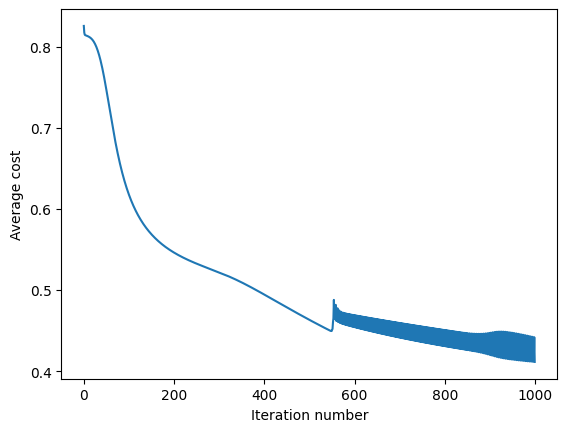

[1 0 0]
[0.83059524 0.16777345 0.00163131]
[0 0 1]
[0.00271299 0.28710962 0.71017739]
[1 0 0]
[0.83164643 0.16673796 0.00161561]
[0 0 1]
[0.00205109 0.25744399 0.74050492]
[0 0 1]
[0.00179217 0.24400641 0.75420142]
[0 0 1]
[0.00178646 0.24369858 0.75451495]
[0 1 0]
[0.01600221 0.52388887 0.46010892]
[1 0 0]
[0.83176222 0.16662629 0.00161149]
[0 0 1]
[0.00196962 0.25332118 0.7447092 ]
[1 0 0]
[0.83244583 0.16595926 0.00159491]
[1 0 0]
[0.82995364 0.16840389 0.00164247]
[0 1 0]
[0.00216275 0.26285138 0.73498587]
[0 0 1]
[0.00183258 0.24619147 0.75197595]
[0 0 1]
[0.00177425 0.24301825 0.7552075 ]
[0 1 0]
[0.0085504  0.43311534 0.55833427]
[0 1 0]
[0.01036795 0.46082726 0.5288048 ]
[0 0 1]
[0.00179158 0.2439639  0.75424452]
[1 0 0]
[0.83082787 0.16754275 0.00162938]
[0 1 0]
[0.02833018 0.60662783 0.36504199]
[0 0 1]
[0.00187677 0.2485012  0.74962204]
[0 0 1]
[0.00179613 0.24423125 0.75397262]
[0 1 0]
[0.02408825 0.58390171 0.39201005]
[0 1 0]
[0.04756968 0.67251352 0.27991679]
[0 1 0]
[0.

In [28]:
# 신경망은 총 3개의 레이어로 구성되어
# 입력 레이어의 노드 개수 4, 히든레이어 개수4, 출력레이어 개수 3
node_size = {'input_layer_size':4,
             'hidden_layer_size':8,
             'output_layer_size':3
             }

learning_rate = 1.0

# 초기 가중치 값으로 무작위 값을 사용
# 각 넘파이 배열 생성 시 아규먼트에 포함되는 레이어 순서를 봐주면 된다.
W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2 = np.random.random(node_size['output_layer_size'])
b1 = np.random.random(node_size['hidden_layer_size'])

count = 0
max_iteration = 1000
dataset_size = len(Y)
list_average_cost = []

while count < max_iteration:
    dW2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
    dW1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
    db2 = np.zeros(node_size['output_layer_size'])
    db1 = np.zeros(node_size['hidden_layer_size'])
    average_cost = 0
    for x, y in zip(X_shuffled, Y_shuffled):
        a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)
        # 역전파 알고리즘을 실행
        delta3 = -(y - a3) * softmax_derivative(a3)
        average_cost += np.linalg.norm((y - a3), 2) / dataset_size
        delta2 = np.dot(W2.T, delta3) * sigmoid_derivative(z2)
        dW2 += np.dot(delta3[:, np.newaxis], np.transpose(a2[:, np.newaxis])) / dataset_size
        db2 += delta3 / dataset_size
        dW1 += np.dot(delta2[:, np.newaxis], np.transpose(a1[:, np.newaxis])) / dataset_size
        db1 += delta2 / dataset_size
    # 역전파 알고리즘 실행결과를 사용하여 신경망의 가중치와 편향을 업데이트한다.
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    W1 += -learning_rate * dW1
    b1 += -learning_rate * db1
    # 매 반복시 측정된 비율을 리스트에 저장
    list_average_cost.append(average_cost)
    if count%100 == 0:
      print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    count += 1
# 반복횟수에 대비 비용그래프로 그린다.
Figure,ax = plt.subplots(1,1)
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X_shuffled,Y_shuffled):
  a1,a2,a3,z2,z3 = feed_forward(x,W1,W2,b1,b2)
  print(y)
  print(a3)